In [1]:
%pylab inline 
from bigfile import BigFile

from astrodatapy.number_density import number_density
from astrodatapy.correlation    import correlation
from astrodatapy.clustering     import clustering

cosmo = {'omega_M_0' : 0.2814,
'omega_lambda_0' : 0.7186,
'omega_b_0' : 0.0464,
'omega_n_0' : 0.0,
'N_nu' : 0,
'h' : 0.697,
'n' : 0.971,
'sigma_8' : 0.820
}

plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15) 

Populating the interactive namespace from numpy and matplotlib


In [2]:
################################################################################
hh = 0.697

# fiducial BH feedback
file1 = ['/scratch/06431/yueyingn/hydro-25MPC/output_test8/PIG_006',
         '/scratch/06431/yueyingn/hydro-25MPC/output_test8/PIG_009',
         '/scratch/06431/yueyingn/hydro-25MPC/output_test8/PIG_012']
for i in file1:
    print (1./BigFile(i).open('Header').attrs['Time']-1)


# Top-hat BH feedback
file2 = ['/scratch/06431/yueyingn/hydro-25MPC/output_test10/PIG_005',
         '/scratch/06431/yueyingn/hydro-25MPC/output_test10/PIG_007',
         '/scratch/06431/yueyingn/hydro-25MPC/output_test10/PIG_009',
         '/scratch/06431/yueyingn/hydro-25MPC/output_test10/PIG_013']

for i in file2:
    print (1./BigFile(i).open('Header').attrs['Time']-1)

    
def getstr(pig):
    return np.transpose(BigFile(pig).open('FOFGroups/MassByType')[:])[4]*10**10/hh

def mf(m,Lbox):
    mbin = np.logspace(6,12,18)
    binmid=np.log10(mbin)[:-1]+np.diff(np.log10(mbin))/2
    mhis = np.histogram(m,mbin)
    mask = mhis[0]>0
    Volumndlog = np.diff(np.log10(mbin))*(Lbox/hh)**3
    yy = mhis[0]/Volumndlog
    err = yy[mask]/np.sqrt(mhis[0][mask])
    y1 = np.log10(yy[mask]+err)
    y2 = yy[mask]-err
    y2[y2<=0] = 1e-50
    return (binmid[mask]),np.log10(yy[mask]), y1, np.log10(y2)

def get_gsmf(pig,Lbox):
    sm = getstr(pig)    
    rsl = 2*min(sm[sm>0])
    smf = mf(sm[sm>rsl],Lbox)
    return smf

################################################################################

color2 = {'Song2016':'#0099e6','Grazian2015':'#7f8c83','Gonzalez2011':'#ffa64d',\
          'Duncan2014':'#F08080','Stefanon2017':'#30ba52'}

marker2 = {'Song2016':'o','Grazian2015':'s','Gonzalez2011':'v',\
          'Duncan2014':'^','Stefanon2017':'<'}

[4.9999988]
[4.]
[3.]
[4.9999988]
[4.]
[3.]
[2.0000003]


z= [4.9999988]
z= [4.9999988]
z= [4.]
z= [4.]
z= [3.]
z= [3.]
z= [2.0000003]


(-4, -1)

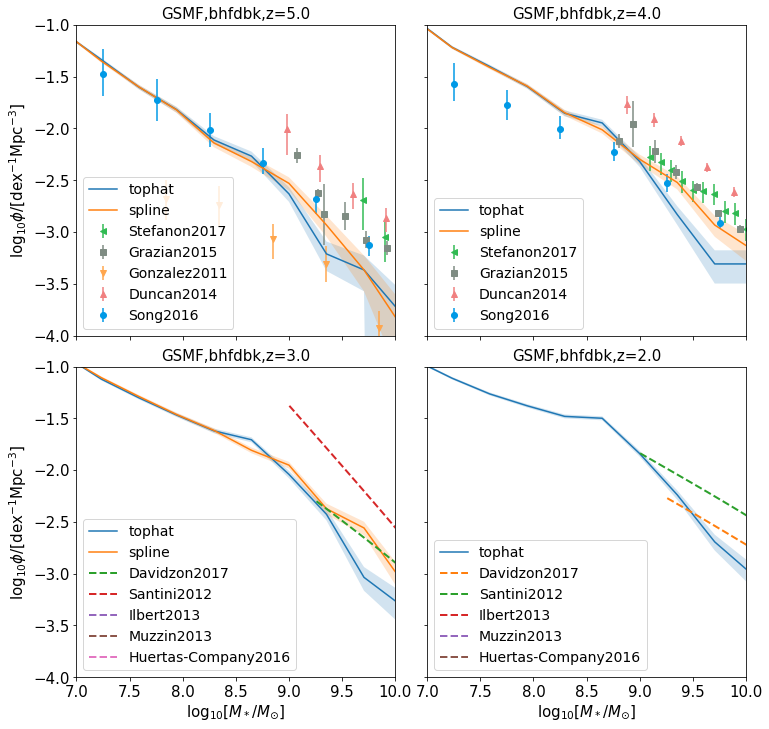

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all',figsize=(12,12))
fig.subplots_adjust(hspace=0.1,wspace=0.1)

feature='GSMF'

###########################################################################################
ax = axes.flat[0]

i = file2[0]
redshift = (1./BigFile(i).open('Header').attrs['Time']-1)
print ('z=',redshift)

lfm = get_gsmf(i,25)
ax.plot(lfm[0],(lfm[1]),label='tophat')
ax.fill_between(lfm[0],lfm[2],lfm[3],alpha=0.2)

i = file1[0]
redshift = (1./BigFile(i).open('Header').attrs['Time']-1)
print ('z=',redshift)

lfm = get_gsmf(i,25)
ax.plot(lfm[0],(lfm[1]),label='spline')
ax.fill_between(lfm[0],lfm[2],lfm[3],alpha=0.2)

obs = number_density(feature=feature,z_target=redshift,quiet=1,h=cosmo['h'])
for ii in range(obs.n_target_observation):
    data       = obs.target_observation['Data'][ii]
    label      = obs.target_observation.index[ii]
    datatype   = obs.target_observation['DataType'][ii]
    
    if datatype == 'data':
        data[:,1:] = np.log10(data[:,1:])
        color      = color2[label]
        marker     = marker2[label]
        ax.errorbar(data[:,0],  data[:,1], yerr = [data[:,1]-data[:,3],data[:,2]- data[:,1]],\
                    label=label,color=color,fmt=marker)
    else:
        continue

ax.legend(fontsize=14)
ax.set_title('GSMF,bhfdbk,z=%.1f'%redshift,fontsize=15)
ax.set_ylabel(r'$\mathrm{log}_{10} \phi/[\mathrm{dex}^{-1} \mathrm{Mpc}^{-3}]$',fontsize=15)
###########################################################################################

ax = axes.flat[1]

i = file2[1]
redshift = (1./BigFile(i).open('Header').attrs['Time']-1)
print ('z=',redshift)

lfm = get_gsmf(i,25)
ax.plot(lfm[0],(lfm[1]),label='tophat')
ax.fill_between(lfm[0],lfm[2],lfm[3],alpha=0.2)

i = file1[1]
redshift = (1./BigFile(i).open('Header').attrs['Time']-1)
print ('z=',redshift)

lfm = get_gsmf(i,25)
ax.plot(lfm[0],(lfm[1]),label='spline')
ax.fill_between(lfm[0],lfm[2],lfm[3],alpha=0.2)

obs = number_density(feature=feature,z_target=redshift,quiet=1,h=cosmo['h'])
for ii in range(obs.n_target_observation):
    data       = obs.target_observation['Data'][ii]
    label      = obs.target_observation.index[ii]
    datatype   = obs.target_observation['DataType'][ii]
    
    if datatype == 'data':
        data[:,1:] = np.log10(data[:,1:])
        color      = color2[label]
        marker     = marker2[label]
        ax.errorbar(data[:,0],  data[:,1], yerr = [data[:,1]-data[:,3],data[:,2]- data[:,1]],\
                    label=label,color=color,fmt=marker)
    else:
        continue

ax.legend(fontsize=14)
ax.set_title('GSMF,bhfdbk,z=%.1f'%redshift,fontsize=15)
# ax.set_ylabel(r'$\mathrm{log}_{10} \phi/[\mathrm{dex}^{-1} \mathrm{Mpc}^{-3}]$',fontsize=15)
###########################################################################################

ax = axes.flat[2]

i = file2[2]
redshift = (1./BigFile(i).open('Header').attrs['Time']-1)
print ('z=',redshift)

lfm = get_gsmf(i,25)
ax.plot(lfm[0],(lfm[1]),label='tophat')
ax.fill_between(lfm[0],lfm[2],lfm[3],alpha=0.2)

i = file1[2]
redshift = (1./BigFile(i).open('Header').attrs['Time']-1)
print ('z=',redshift)

lfm = get_gsmf(i,25)
ax.plot(lfm[0],(lfm[1]),label='spline')
ax.fill_between(lfm[0],lfm[2],lfm[3],alpha=0.2)

obs = number_density(feature=feature,z_target=redshift,quiet=1,h=cosmo['h'])
for ii in range(obs.n_target_observation):
    data       = obs.target_observation['Data'][ii]
    label      = obs.target_observation.index[ii]
    datatype   = obs.target_observation['DataType'][ii]
    
    if datatype == 'Schechter':   
        data[:,1:] = np.log10(data[:,1:])
        ax.plot(data[:,0],data[:,1],linestyle='--',lw=2,label=label)

ax.legend(fontsize=14)
ax.set_title('GSMF,bhfdbk,z=%.1f'%redshift,fontsize=15)
ax.set_xlabel(r'$\mathrm{log}_{10} [M_*/M_{\odot}]$',fontsize=15)
ax.set_ylabel(r'$\mathrm{log}_{10} \phi/[\mathrm{dex}^{-1} \mathrm{Mpc}^{-3}]$',fontsize=15)
###########################################################################################

ax = axes.flat[3]

i = file2[3]
redshift = (1./BigFile(i).open('Header').attrs['Time']-1)
print ('z=',redshift)

lfm = get_gsmf(i,25)
ax.plot(lfm[0],(lfm[1]),label='tophat')
ax.fill_between(lfm[0],lfm[2],lfm[3],alpha=0.2)

# data = np.loadtxt('./GSMF_data/Saniti2012_z2.txt',delimiter=',')
# ax.scatter(data[:,0],data[:,1],c='green',label='Saniti 2012')

# data = np.loadtxt('./GSMF_data/Tomczak_z2.txt',delimiter=',')
# ax.scatter(data[:,0],data[:,1],c='purple',label='Tomczak 2013')


obs = number_density(feature=feature,z_target=redshift,quiet=1,h=cosmo['h'])
for ii in range(obs.n_target_observation):
    data       = obs.target_observation['Data'][ii]
    label      = obs.target_observation.index[ii]
    datatype   = obs.target_observation['DataType'][ii]
    
    if datatype == 'Schechter':   
        data[:,1:] = np.log10(data[:,1:])
        ax.plot(data[:,0],data[:,1],linestyle='--',lw=2,label=label)

ax.legend(fontsize=14)
ax.set_title('GSMF,bhfdbk,z=%.1f'%redshift,fontsize=15)
ax.set_xlabel(r'$\mathrm{log}_{10} [M_*/M_{\odot}]$',fontsize=15)
# ax.set_ylabel(r'$\mathrm{log}_{10} \phi/[\mathrm{dex}^{-1} \mathrm{Mpc}^{-3}]$',fontsize=15)
###########################################################################################

ax.set_xlim(7,10)
ax.set_ylim(-4,-1)